In [1]:
#Importo librerias a utilizar
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Visualizo el formato del dataframe con los 5 primeros registros
df = pd.read_csv('df_limpio.csv')
df.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,cast,crew,vote_count,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,['English'],Released,NaN,Toy Story,7.7,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],5415.0,1995,12.451801
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],2413.0,1995,4.043035
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],92.0,1995,0.000000
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,"['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],34.0,1995,5.090760
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,"['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],173.0,1995,0.000000


In [3]:
print(f"El dataframe contiene {df.shape[0]} columnas y {df.shape[1]} filas")

El dataframe contiene 45451 columnas y 22 filas


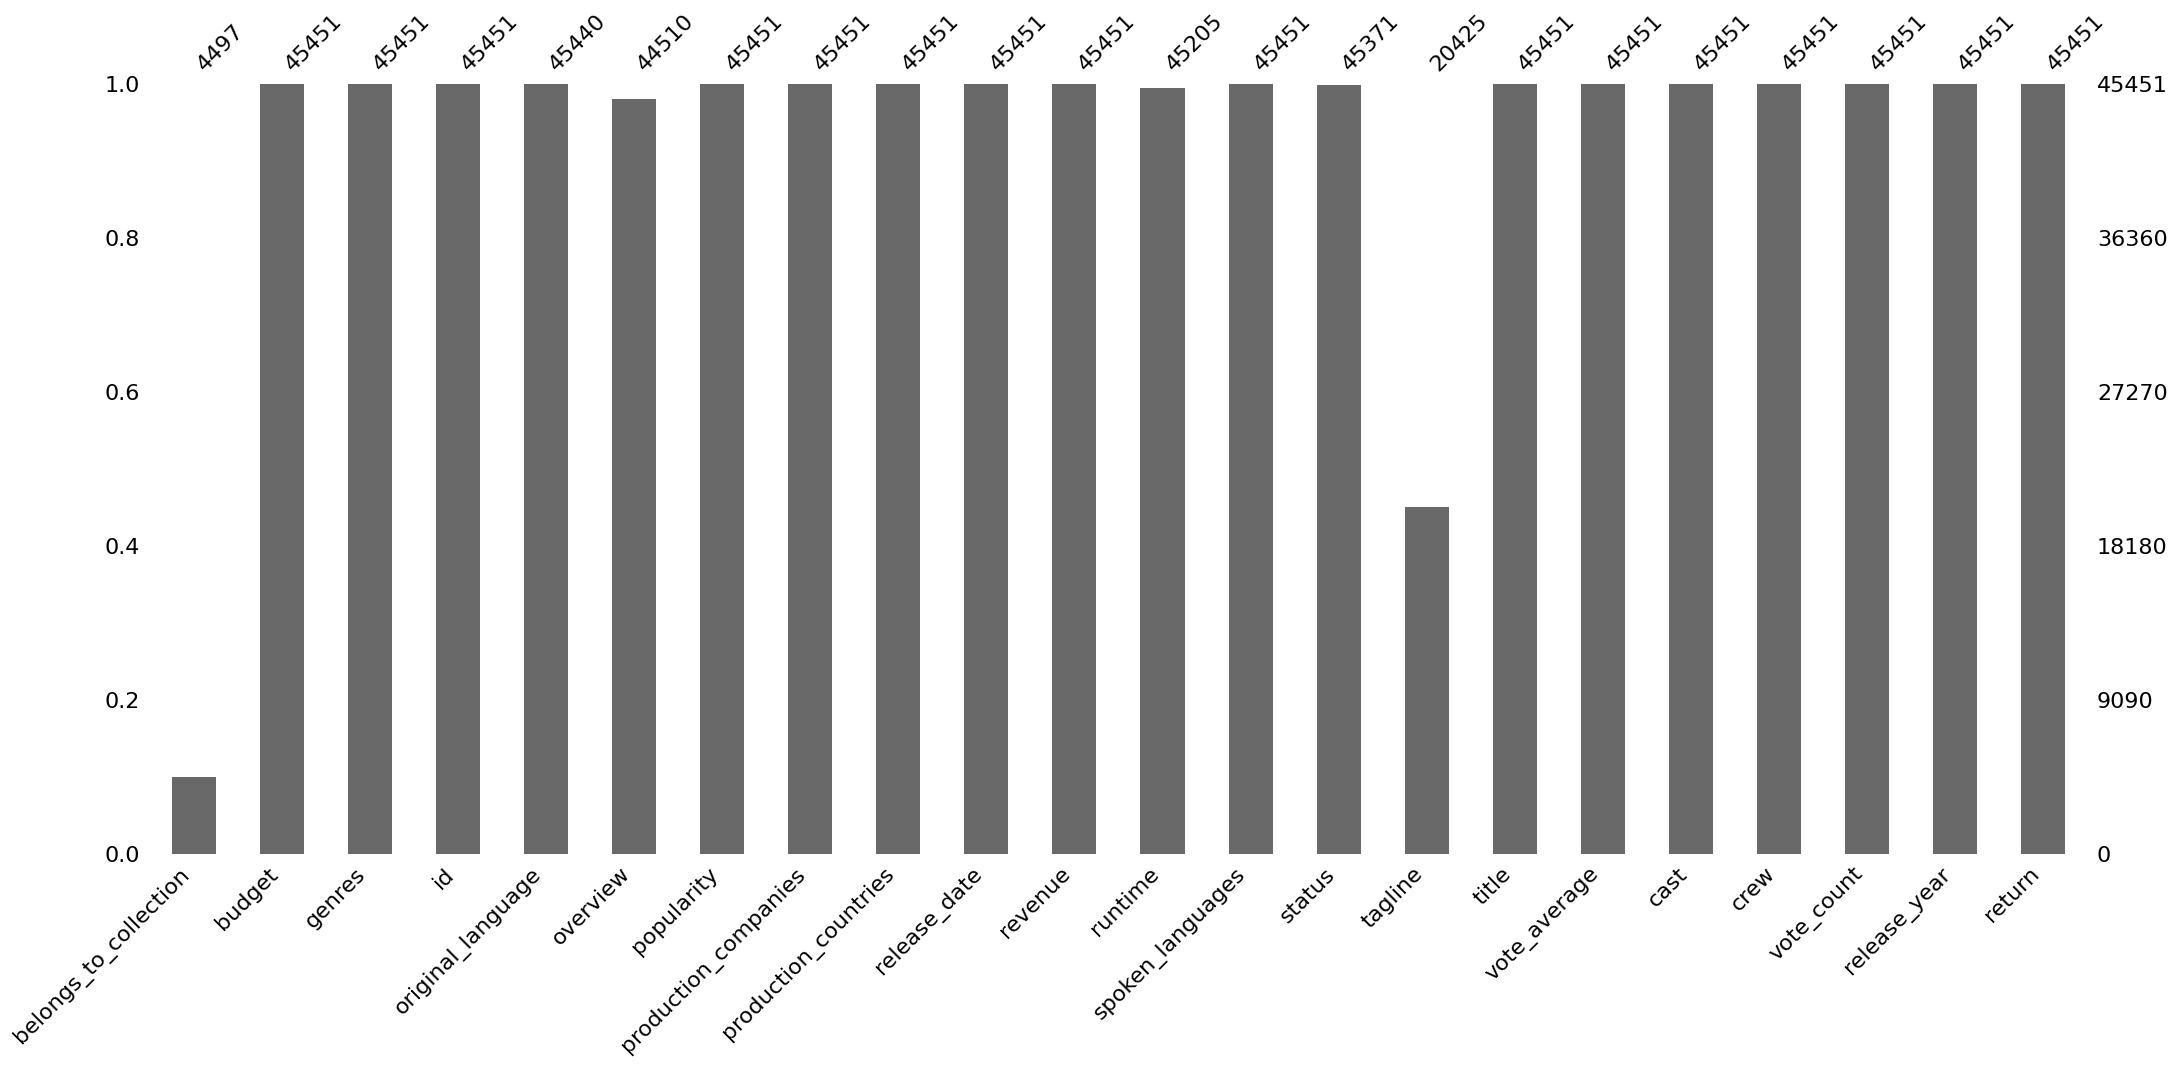

In [4]:
#Visualizo los valores faltantes de las columnas del dataframe con missingno
msno.bar(df)
plt.show()

In [5]:
dfML = pd.read_csv("df_limpio.csv")
dfML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45451 non-null  float64
 2   genres                 45451 non-null  object 
 3   id                     45451 non-null  int64  
 4   original_language      45440 non-null  object 
 5   overview               44510 non-null  object 
 6   popularity             45451 non-null  float64
 7   production_companies   45451 non-null  object 
 8   production_countries   45451 non-null  object 
 9   release_date           45451 non-null  object 
 10  revenue                45451 non-null  float64
 11  runtime                45205 non-null  float64
 12  spoken_languages       45451 non-null  object 
 13  status                 45371 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

In [6]:
#Creo columnas de MESES y DIAS para utilizar en visualizaciones

dfML["release_date"] = pd.to_datetime(dfML["release_date"])
dfML["release_month"] = dfML["release_date"].dt.month
dfML["release_day"] = dfML["release_date"].dt.day_name()

dias = {"Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miercoles",
    "Thursday" : "Jueves",
    "Friday": "Viernes",
    "Saturday":"Sabado",
    "Sunday": "Domingo"}

dfML["release_day"] = dfML["release_day"].map(dias)

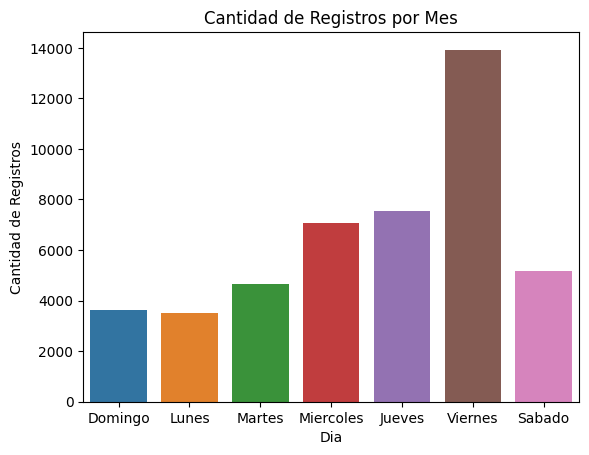

In [7]:
#Grafico la cantidad de peliculas estrenadas en cada dia
conteo_dias = dfML["release_day"].value_counts().sort_index()
order = ["Domingo", "Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado"]

sns.barplot(x=conteo_dias.index, y=conteo_dias.values, order=order)
plt.xlabel("Dia")
plt.ylabel("Cantidad de Registros")
plt.title("Cantidad de Registros por Dia")
plt.show()

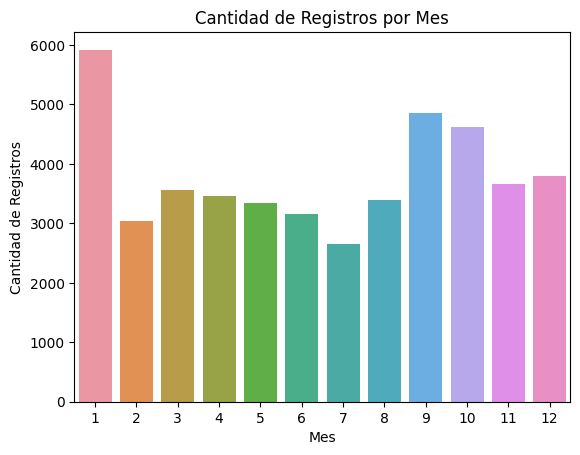

In [8]:
#Grafico la cantidad de peliculas estrenadas en cada mes
conteo_meses = dfML["release_month"].value_counts().sort_index()
sns.barplot(x=conteo_meses.index, y=conteo_meses.values)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Registros")
plt.title("Cantidad de Registros por Mes")
plt.show()

In [9]:
#Visualizo en un dataframe el director con mayor cantidad de peliculas y su retorno total
df_director = dfML.groupby(str("crew")).agg({'return': 'sum', 'title': 'count'})
df_director = df_director.sort_values('title', ascending=False)
df_director = df_director.reset_index() #La columna crew queda como indice, la devuelvo a su formato de columna con su nombre
df_director = df_director.rename(columns={'index': 'crew'})
df_director = df_director.drop(df_director[df_director['crew'] == "[]"].index) #elimino de la visualizacion las listas vacias en crew
df_director.head(10)

,crew,return,title
1,['John Ford'],2.408128e+01,63
2,['Michael Curtiz'],2.107653e+01,61
3,['Werner Herzog'],1.141278e+00,52
4,['Alfred Hitchcock'],1.624368e+02,52
5,['Georges Méliès'],0.000000e+00,51
6,['Woody Allen'],9.688784e+01,47
7,['Sidney Lumet'],5.079275e+01,45
8,['Charlie Chaplin'],8.500019e+06,43
9,['Henry Hathaway'],8.057143e+00,41
10,['William A. Wellman'],0.000000e+00,41


In [10]:
#Visualizo en un dataframe los actores con mayor cantidad de peiculas y el promedio de votos
df_actores = df.explode('cast')
df_actores = dfML.groupby(("cast")).agg({'vote_average': 'mean', 'title': 'count'})
df_actores = df_actores.sort_values('title', ascending=False)
df_actores = df_actores.reset_index() #La columna cast queda como indice, la devuelvo a su formato de columna con su nombre
df_actores = df_actores.rename(columns={'index': 'cast'})
df_actores = df_actores.drop(df_actores[df_actores['cast'] == "[]"].index) #elimino de la visualizacion las listas vacias en cast
df_actores.head(10)

,cast,vote_average,title
1,['Georges Méliès'],5.904167,24
2,['Louis Theroux'],7.066667,15
3,['Mel Blanc'],7.175000,12
4,"['Petteri Summanen', 'Ismo Kallio', 'Eppu Salm...",6.700000,9
5,['Jimmy Carr'],7.444444,9
6,['Werner Herzog'],7.175000,8
7,['David Attenborough'],7.050000,8
8,['Louis C.K.'],7.787500,8
9,['George Carlin'],7.737500,8
10,['Patton Oswalt'],7.266667,6


In [11]:
#Visualizo las peliculas con mayor promedio de votos, con genero y actores
df_peliculas = dfML.groupby(("title")).agg({'vote_average': 'mean'})
df_peliculas = df_peliculas.sort_values('vote_average', ascending=False)
df_peliculas = df_peliculas.reset_index() #La columna cast queda como indice, la devuelvo a su formato de columna con su nombre
df_peliculas = df_peliculas.rename(columns={'index': 'title'})
df_peliculas["genres"] = dfML["genres"]
df_peliculas["cast"] = dfML["cast"]
df_peliculas

,title,vote_average,genres,cast
0,Titus Andronicus,10.0,"['Animation', 'Comedy', 'Family']","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,Something in the Wind,10.0,"['Adventure', 'Fantasy', 'Family']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,"Oh, Bomb!",10.0,"['Romance', 'Comedy']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret..."
3,"The Haunted World of Edward D. Wood, Jr.",10.0,"['Comedy', 'Drama', 'Romance']","['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,Harold and Lillian: A Hollywood Love Story,10.0,['Comedy'],"['Steve Martin', 'Diane Keaton', 'Martin Short..."
...,...,...,...,...
42190,Le mystère de la tour Eiffel,0.0,"['Action', 'Science Fiction', 'Thriller']","['Sam Neill', 'Tom Payne', 'Melia Kreiling', '..."
42191,Le Rossignol,0.0,"['Documentary', 'Comedy', 'TV Movie']","['George Carlin', 'Rick Ducommun', 'Anthony Ja..."
42192,Le Rebelle,0.0,"['Mystery', 'Crime', 'TV Movie', 'Horror']","['Hal Holbrook', 'Katharine Ross', 'Richard An..."
42193,Le Monde doit m'arriver,0.0,"['Mystery', 'Drama', 'Thriller']","['Zoey Deutch', 'Halston Sage', 'Logan Miller'..."


In [12]:
#Visualizo los 10 paises con mayores producciones 

df_paises = dfML.explode('production_countries')
df_paises = dfML.groupby(("production_countries")).agg({'title': 'count'})
df_paises = df_paises.sort_values('title', ascending=False)
df_paises = df_paises.reset_index()
df_paises = df_paises.rename(columns={'index': 'production_countries'})
df_paises = df_paises.drop(df_paises[df_paises['production_countries'] == "[]"].index)
df_paises = df_paises[:10]
df_paises

,production_countries,title
0,['United States of America'],17868
2,['United Kingdom'],2238
3,['France'],1656
4,['Japan'],1360
5,['Italy'],1029
6,['Canada'],841
7,['Germany'],752
8,['India'],735
9,['Russia'],734
10,"['United Kingdom', 'United States of America']",569


In [13]:
#Preparo las columnas title y overview para visualizar la nube de palabras de cada una
dfML["title"] = dfML["title"].astype("str")
dfML["overview"] = dfML["overview"].astype("str")
titulos = " ".join(dfML["title"])
overviews = " ".join(dfML["overview"])

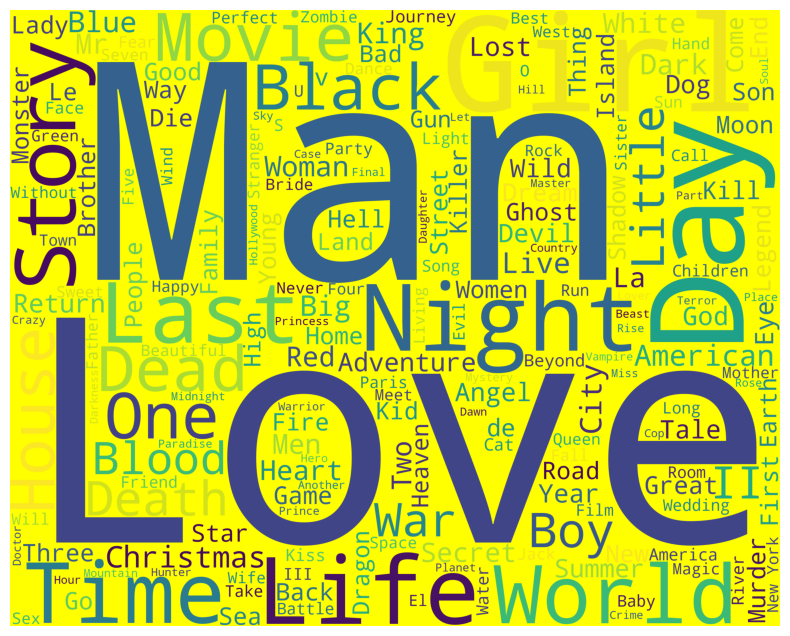

In [14]:
#Visualizo la nube de palabras mas destacadas en la columna titulos
wordcloudTitulos = WordCloud(stopwords=STOPWORDS, background_color="yellow", height=2000, width=2500).generate(titulos)
plt.figure(figsize=(16,8))
plt.imshow(wordcloudTitulos)
plt.axis("off")
plt.show()

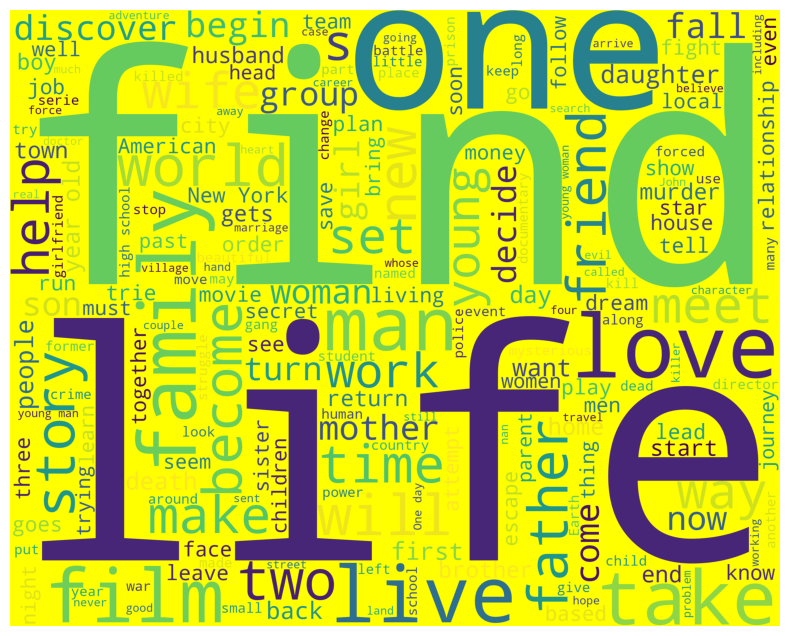

In [15]:
#Visualizo la nube de palabras mas destacadas en la columna overviews
wordcloudOverview = WordCloud(stopwords=STOPWORDS, background_color="yellow", height=2000, width=2500).generate(overviews)
plt.figure(figsize=(16,8))
plt.imshow(wordcloudOverview)
plt.axis("off")
plt.show()